## Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

What variable(s) are the target(s) for your model?

Answer : 'IS_SUCCESSFUL' <br>

What variable(s) are the feature(s) for your model?

Answer : 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT'

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
unique_counts = application_df.nunique()
print(unique_counts)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [ ]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
# Count the occurrences of each unique value in APPLICATION_TYPE
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
cutoff_value = 500
application_types_to_replace = application_type_counts[application_type_counts < cutoff_value].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [ ]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
# Count occurrences of each unique value in CLASSIFICATION
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
# Filter classifications with more than 1 occurrence
classification_counts_gt1 = classification_counts[classification_counts > 1]
# Display the result
classification_counts_gt1

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classification_counts_cutoff = 1000

# Identify classifications to be replaced with "Other"
classifications_to_replace = classification_counts[classification_counts < classification_counts_cutoff].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df = pd.get_dummies(application_df, drop_first=True)
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,108590,1,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,6692,1,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,1,142590,1,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34295,1,5000,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34296,1,5000,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34297,1,5000,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
# Define the target variable ('IS_SUCCESSFUL')
y = application_df['IS_SUCCESSFUL'].values  # Target array

# Define the feature variables (excluding the target column)
X = application_df.drop(columns=['IS_SUCCESSFUL']).values  # Feature array

# Display the shape of X and y
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (34299, 36)
Target shape: (34299,)


In [ ]:
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Select all 36 features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 20 features (adjust K based on dataset size)
selector = SelectKBest(score_func=f_classif, k=36)
X_new = selector.fit_transform(X, y)

# Update training/testing sets
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train_new)

# Scale the data
X_train_scaled = X_scaler.transform(X_train_new)
X_test_scaled = X_scaler.transform(X_test_new)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the number of input features
input_features = X_train_new.shape[1]
print(input_features)

36


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()



# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=input_features))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Check the structure of the model
nn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 80)                  │           2,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,421 (21.18 KB)

 Trainable params: 5,421 (21.18 KB)

 Non-trainable params: 0 (0.00 B)

## Modify the optimizer to use a custom learning rate

In [ ]:
# Modify the optimizer to use a custom learning rate
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)  # Experiment with different rates

In [ ]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
# Create a callback that saves the model's weights every five epochs.
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback to save the model every 5 epochs
checkpoint_callback = ModelCheckpoint(
    filepath='/content/deep_learning_model_weights.{epoch:02d}.weights.h5',  # Save with epoch number
    save_weights_only=True,  # Save only weights, not the entire model
    save_freq= 5,  # Save at the end of every epoch

)

print("✅ Callback created to save weights every 5 epochs.")

✅ Callback created to save weights every 5 epochs.


In [ ]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, batch_size= 32, callbacks= [checkpoint_callback])

Epoch 1/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6816 - loss: 0.6083
Epoch 2/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7257 - loss: 0.5576
Epoch 3/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7312 - loss: 0.5510
Epoch 4/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7288 - loss: 0.5513
Epoch 5/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7323 - loss: 0.5486
Epoch 6/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7326 - loss: 0.5451
Epoch 7/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7262 - loss: 0.5507
Epoch 8/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7292 - loss: 0.5472
Epoch 9/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7368 - loss: 0.5416
Epoch 10/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7335 - loss: 0.5441
Epoch 11/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7359 - loss: 0.5432
Epoch 12/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/s

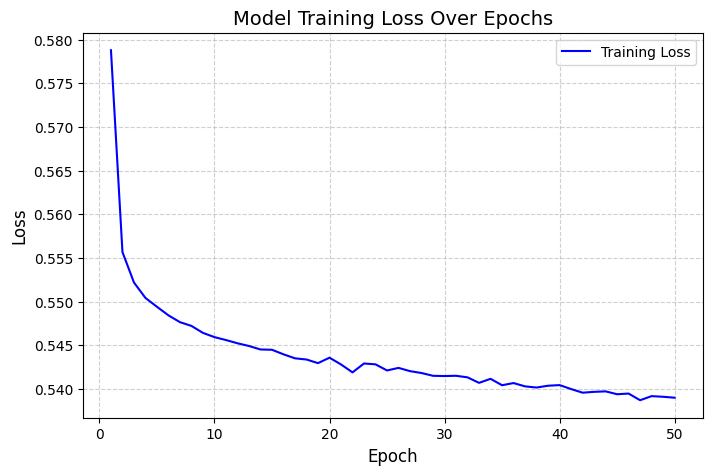

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss with title and axis labels
plt.figure(figsize=(8,5))  # Set figure size
plt.plot(history_df.index, history_df["loss"], label="Training Loss", color="b")

# Add title and labels
plt.title("Model Training Loss Over Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

# Show grid and legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Show the plot
plt.show()

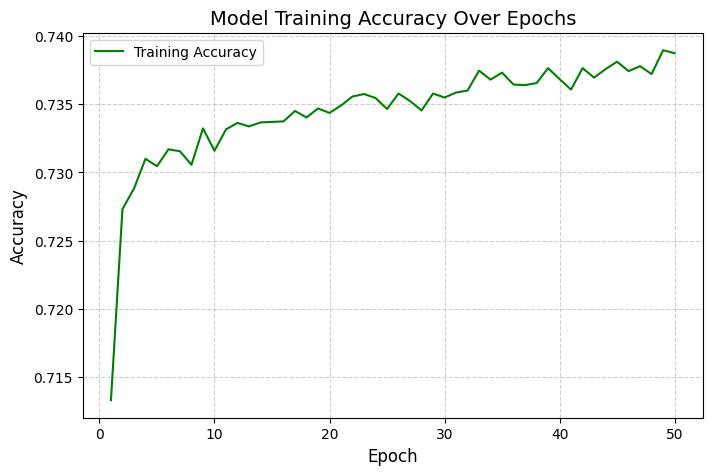

In [ ]:
# Plot accuracy with title and axis labels
plt.figure(figsize=(8,5))  # Set figure size
plt.plot(history_df.index, history_df["accuracy"], label="Training Accuracy", color="g")

# Add title and labels
plt.title("Model Training Accuracy Over Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Show grid and legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - 2ms/step - accuracy: 0.7284 - loss: 0.5559
Loss: 0.5559306144714355, Accuracy: 0.7284256815910339


In [ ]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
# Save the trained model to an HDF5 file
nn.save("/content/deep_learning_model1.h5")

print("Model saved successfully as deep_learning_model1.h5")

Model saved successfully as deep_learning_model1.h5


In [ ]:
from google.colab import files

# Download the model to your local machine
files.download("/content/deep_learning_model1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

# List files in the current directory
print(os.listdir("/content/"))

['.config', 'deep_learning_model_weights.32.weights.h5', 'deep_learning_model_weights.36.weights.h5', 'deep_learning_model_weights.35.weights.h5', 'deep_learning_model_weights.49.weights.h5', 'deep_learning_model_weights.41.weights.h5', 'deep_learning_model_weights.14.weights.h5', 'deep_learning_model_weights.16.weights.h5', 'deep_learning_model_weights.25.weights.h5', 'deep_learning_model_weights.47.weights.h5', 'deep_learning_model_weights.28.weights.h5', 'deep_learning_model_weights.17.weights.h5', 'deep_learning_model_weights.07.weights.h5', 'deep_learning_model_weights.23.weights.h5', 'deep_learning_model_weights.31.weights.h5', 'deep_learning_model_weights.06.weights.h5', 'deep_learning_model_weights.33.weights.h5', 'deep_learning_model_weights.24.weights.h5', 'deep_learning_model_weights.46.weights.h5', 'deep_learning_model_weights.42.weights.h5', 'deep_learning_model_weights.01.weights.h5', 'deep_learning_model_weights.02.weights.h5', 'deep_learning_model_weights.27.weights.h5'